In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://cocl.us/datascience_survey_data", index_col=0)
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [7]:
df.sort_values(by=['Very interested'], ascending=False)

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [8]:
(100. * df / 2233).round(2)

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),59.65,32.65,5.69
Data Analysis / Statistics,75.59,19.88,2.69
Data Journalism,19.21,48.41,27.32
Data Visualization,60.01,32.87,4.57
Deep Learning,56.56,34.48,6.09
Machine Learning,72.95,21.36,3.31


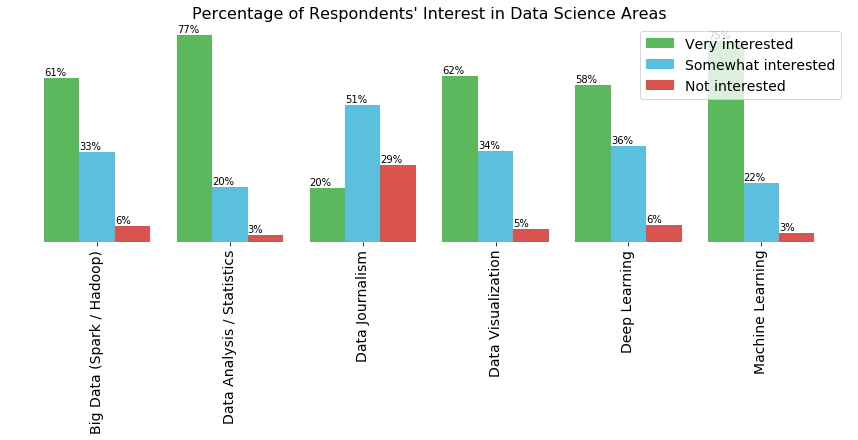

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar',figsize=(15,4),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=df.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

In [31]:
df2 = pd.read_csv("https://cocl.us/sanfran_crime_dataset")

df2.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [33]:
t = df2.PdDistrict.value_counts()
table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
print(table)

            Count
SOUTHERN    28445
NORTHERN    20100
MISSION     19503
CENTRAL     17666
BAYVIEW     14303
INGLESIDE   11594
TARAVAL     11325
TENDERLOIN   9942
RICHMOND     8922
PARK         8699


In [35]:
!conda install -c conda-forge folium
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    folium-0.9.0               |             py_0          59 KB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will be IN

AttributeError: 'Map' object has no attribute 'simple_marker'

In [42]:
sanfran_map = folium.map(location= [37.7749, 122.4194], zoom_start=12)

sanfran_geo = "https://cocl.us/sanfran_geojson"

sanfran_map.choropleth(geo_data= sanfran_geo, data= df2, key_on = 'feature.properties.NEIGHBOURHOOD', column= ['Neighbourhood', 'Count'], \
                     fill_color= 'YlOrRd', fill_opacity= 0.7, line_opacity= 0.2, legend_name="Crime Rate in San Francisco")

display(sanfran_map)

TypeError: 'module' object is not callable